# Week 9.
## Sentiment analysis first!

In [1]:
import nltk
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

In [5]:
imdb = pd.read_csv('./imdb_dataset.csv', nrows=5000, encoding='latin1')


In [6]:
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
reviews = pd.DataFrame(imdb) # just a rename

##  Preprocessing

In [9]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
def preprocess_reviews(review):
    preprocessed_review = review
    preprocessed_review = re.sub('<.*?>', ' ', review)
    preprocessed_review = ' '.join( word for word in 
                                   preprocessed_review.split() 
                                   if word not in stop_words )

    return (preprocessed_review)


In [17]:
reviews['Processed review'] = reviews['review'].apply(lambda x: preprocess_reviews(x))

In [18]:
reviews.head()

,review,sentiment,Processed review
0,One of the other reviewers has mentioned that ...,positive,One reviewers mentioned watching 1 Oz episode ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...,positive,I thought wonderful way spend time hot summer ...
3,Basically there's a family where a little boy ...,negative,Basically there's family little boy (Jake) thi...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love Time Money"" visually stu..."


In [19]:
from textblob import Word, TextBlob

In [21]:
text = TextBlob("Hello, I hate classes.") # TextBlob has its own POS tagging
text.tags

[('Hello', 'NNP'), ('I', 'PRP'), ('hate', 'VBP'), ('classes', 'NNS')]

In [22]:
text.sentences

[Sentence("Hello, I hate classes.")]

In [33]:
TextBlob("I hate Thursdays").sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

In [34]:
reviews['polarity'] = reviews['Processed review'].apply(lambda x: TextBlob(x).sentiment.polarity)
reviews['subjectivity'] = reviews['Processed review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [35]:
reviews.head()

,review,sentiment,Processed review,polarity,subjectivity
0,One of the other reviewers has mentioned that ...,positive,One reviewers mentioned watching 1 Oz episode ...,0.041946,0.498325
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. The filming tec...,0.125651,0.567708
2,I thought this was a wonderful way to spend ti...,positive,I thought wonderful way spend time hot summer ...,0.290873,0.693651
3,Basically there's a family where a little boy ...,negative,Basically there's family little boy (Jake) thi...,0.004167,0.459259
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love Time Money"" visually stu...",0.234551,0.409686


In [38]:
reviews['subjectivity'].mean()

0.5300932253114059

## simple visualization

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\sumin\AppData\Local\Temp\ipykernel_6032\2084070111.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reviews['subjectivity'])


<Axes: xlabel='subjectivity', ylabel='Density'>

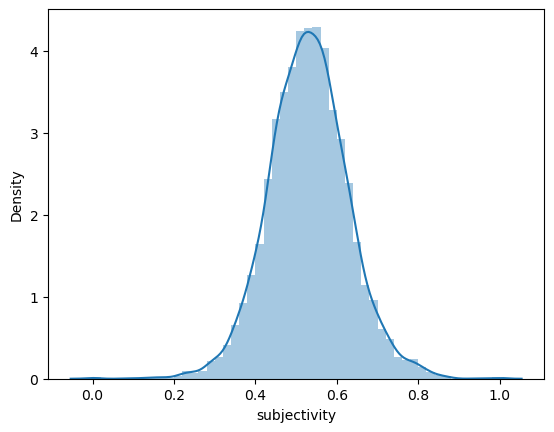

In [39]:
sns.distplot(reviews['subjectivity'])